# Full Prediction Results

In [1]:
import os

import seaborn as sns
from lqsvg.experiment import plot
from lqsvg.experiment.utils import wandb_runs_dataframe
from matplotlib import pyplot as plt

/Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


## Matplotlib setup

Latex presets ([ref](https://jwalton.info/Embed-Publication-Matplotlib-Latex/))

In [2]:
from functools import partial

plot.create_latex_style()
set_size = partial(plot.latex_size, width="thesis")

In [3]:
print(*plot.available_styles())

Solarize_Light2 _classic_test_patch bmh classic dark_background fast fivethirtyeight ggplot grayscale seaborn seaborn-bright seaborn-colorblind seaborn-dark seaborn-dark-palette seaborn-darkgrid seaborn-deep seaborn-muted seaborn-notebook seaborn-paper seaborn-pastel seaborn-poster seaborn-talk seaborn-ticks seaborn-white seaborn-whitegrid tableau-colorblind10 tex


In [4]:
print(f"Your style sheets are located at: {plot.STYLE_PATH}")

Your style sheets are located at: /Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib


In [5]:
# Using seaborn's style
# plt.style.use("seaborn")
sns.set()
# With LaTex fonts
plt.style.use("tex")

In [6]:
def figpath(name: str) -> str:
    return os.path.join("images", name + ".pdf")


def savefig(fig, name):
    return plot.save_pdf_tight(fig, figpath(name))

## MAAC vs. MAGE vs. MAAC+MAGE

In [7]:
DATA = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={},
    tags=["PredictionFull"],
)
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   time_this_iter_s                        299 non-null    float64
 1   _step                                   299 non-null    float64
 2   grad_precision                          299 non-null    float64
 3   iterations_since_restore                299 non-null    float64
 4   timesteps_since_restore                 299 non-null    float64
 5   reward/val/loss                         299 non-null    float64
 6   _runtime                                299 non-null    float64
 7   grad_accuracy                           299 non-null    float64
 8   dynamics/val/loss                       299 non-null    float64
 9   training_iteration                      299 non-null    float64
 10  qvalue/val/loss                         299 non-null    float6

In [8]:
DATA["dim"] = DATA["config/env_config/n_ctrl"]
DATA["strategy"] = DATA["config/strategy"]

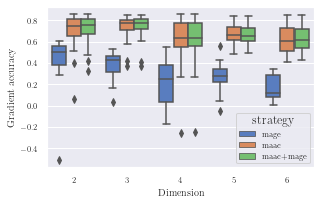

In [10]:
fig = plt.figure(figsize=set_size(fraction=0.8))
ax = sns.boxplot(
    data=DATA,
    x="dim",
    y="summary/grad_accuracy",
    hue="strategy",
    hue_order=["mage", "maac", "maac+mage"],
    palette="muted",
)
ax.set_xlabel("Dimension")
ax.set_ylabel("Gradient accuracy")
savefig(fig, "prediction_roundup")